In [ ]:
from ezc3d import c3d
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelmin
import numpy as np

c = c3d(r"D:\student\MTech\Sakshi\STW\S01\ExpData\Mocap\stw1.c3d")
print(c.keys())
markers = c['data']['points']
analog = c['data']['analogs']  # Shape: (N_subframes, N_channels, N_frames)
# Marker labels
labels = c['parameters']['POINT']['LABELS']['value']
print(labels)  # List of marker names

# Analog channel names
analog_labels = c['parameters']['ANALOG']['LABELS']['value']
xyz = markers[:3, :, :]

marker_index = labels.index('RASIS')  
trajectory_rpsi = xyz[:, marker_index, :] 

plt.plot(trajectory_rpsi[0], label='X')
plt.plot(trajectory_rpsi[1], label='Y')
plt.plot(trajectory_rpsi[2], label='Z')
plt.title('RASIS')
plt.legend()
plt.show()

marker_index = labels.index('LASIS')  
trajectory_lpsi = xyz[:, marker_index, :] 

plt.plot(trajectory_lpsi[0], label='X')
plt.plot(trajectory_lpsi[1], label='Y')
plt.plot(trajectory_lpsi[2], label='Z')
plt.title('LASIS')
plt.legend()
plt.show()

NameError: name 'c3d' is not defined

In [15]:
def align_axis(traj):
    diffs = traj[:, -1] - traj[:, 0]         
    axis = np.argmax(np.abs(diffs))           
    return axis

def absolute(x, axis):
    if (x[axis][-1] - x[axis][0]) < 0:
        x[0]=list(reversed(x[0]))
        x[1]=list(reversed(x[1]))
        x[2]=list(reversed(x[2]))
        return x
    else:
        return x

In [18]:
trajectory_sacrum = (trajectory_lpsi + trajectory_rpsi)/2
axis = align_axis(trajectory_sacrum) 
print("Axis = ", axis)

trajectory_sacrum[axis][-1] - trajectory_sacrum[axis][0]

Axis =  0


1690.8427124023438

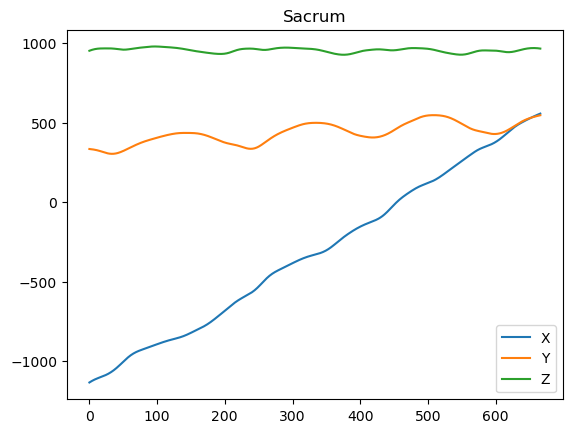

Axis =  0


In [20]:
trajectory_sacrum = (trajectory_lpsi + trajectory_rpsi)/2
plt.plot(trajectory_sacrum[0], label='X')
plt.plot(trajectory_sacrum[1], label='Y')
plt.plot(trajectory_sacrum[2], label='Z')
plt.title('Sacrum')
plt.legend()
plt.show()

axis = align_axis(trajectory_sacrum) 
print("Axis = ", axis)
trajectory_sacrum = absolute(trajectory_sacrum, axis)

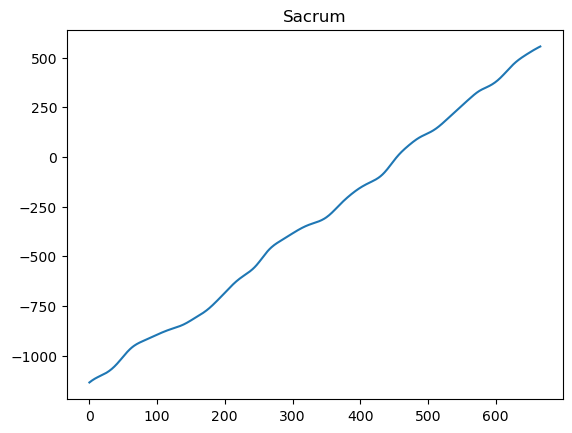

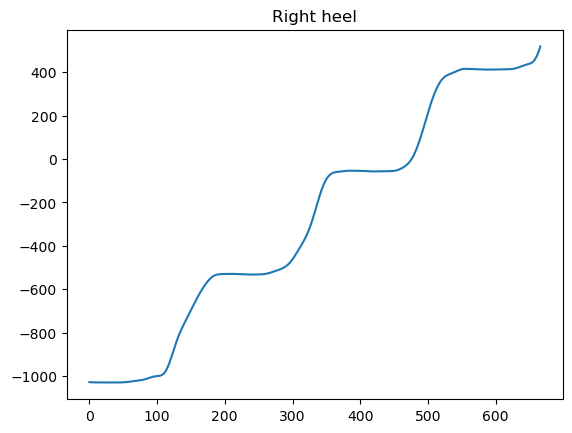

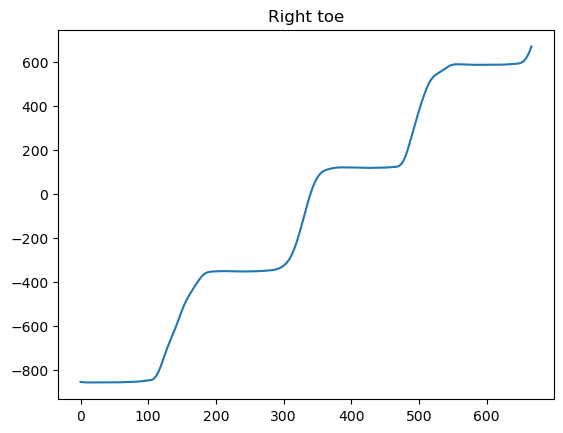

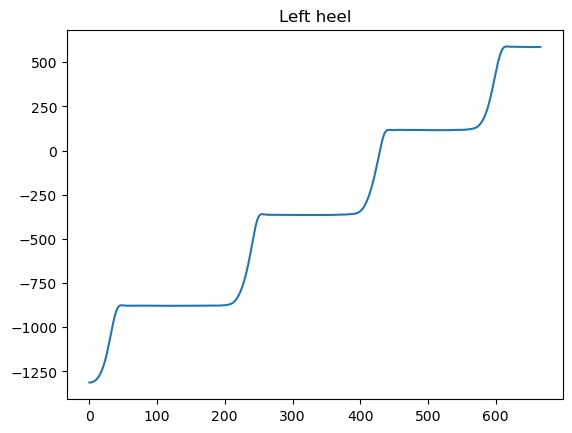

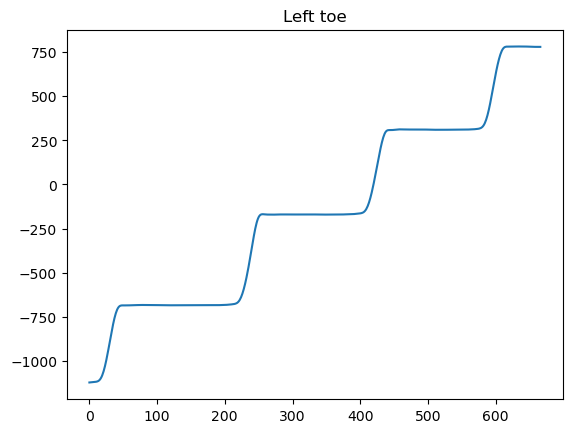

In [22]:
trajectory_sacrum = trajectory_sacrum[axis]
plt.plot(trajectory_sacrum)
plt.title('Sacrum')
plt.show()

marker_index = labels.index('RHEE')  
trajectory_rhee = xyz[:, marker_index, :] 

trajectory_rhee = absolute(trajectory_rhee, axis)

trajectory_rhee = trajectory_rhee[axis]
plt.plot(trajectory_rhee)
plt.title('Right heel')
plt.show()

marker_index = labels.index('RTOE')  
trajectory_rtoe = xyz[:, marker_index, :] 

trajectory_rtoe = absolute(trajectory_rtoe, axis)

trajectory_rtoe = trajectory_rtoe[axis]
plt.plot(trajectory_rtoe)
plt.title('Right toe')
plt.show()

marker_index = labels.index('LHEE')  
trajectory_lhee = xyz[:, marker_index, :] 

trajectory_lhee = absolute(trajectory_lhee, axis)

trajectory_lhee = trajectory_lhee[axis]
plt.plot(trajectory_lhee)
plt.title('Left heel')
plt.show()

marker_index = labels.index('LTOE')  
trajectory_ltoe = xyz[:, marker_index, :] 

trajectory_ltoe = absolute(trajectory_ltoe, axis)

trajectory_ltoe = trajectory_ltoe[axis]
plt.plot(trajectory_ltoe)
plt.title('Left toe')
plt.show()

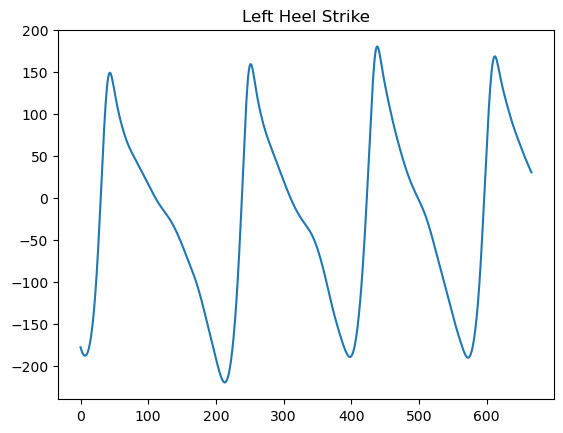

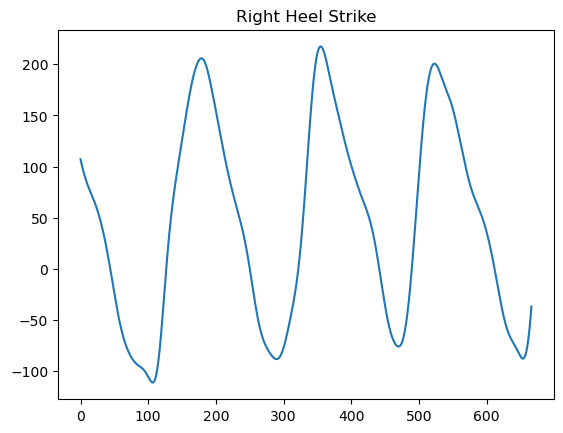

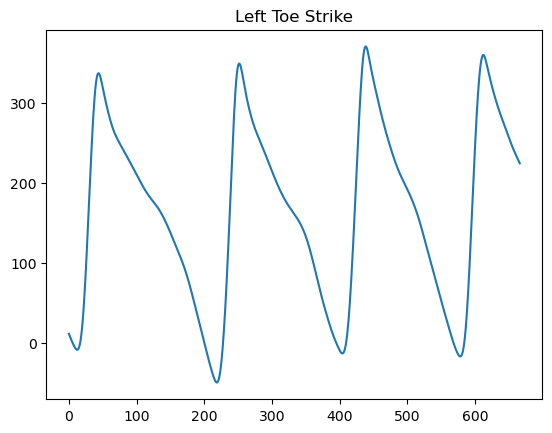

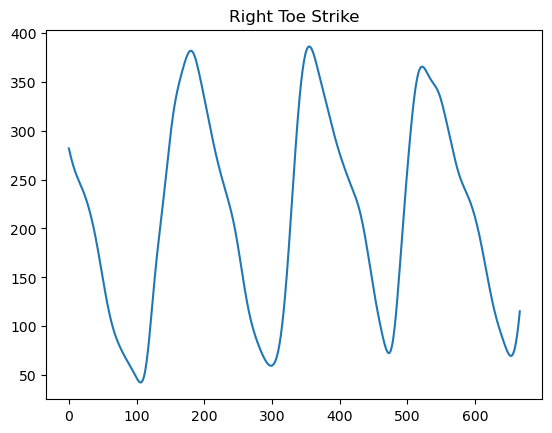

In [27]:
lhs = trajectory_lhee - trajectory_sacrum
rhs = trajectory_rhee - trajectory_sacrum
lto = trajectory_ltoe - trajectory_sacrum
rto = trajectory_rtoe - trajectory_sacrum

plt.plot(lhs)
plt.title('Left Heel Strike')
plt.show()

plt.plot(rhs)
plt.title('Right Heel Strike')
plt.show()

plt.plot(lto)
plt.title('Left Toe Strike')
plt.show()

plt.plot(rto)
plt.title('Right Toe Strike')
plt.show()

In [29]:
print(f"Left heel strike:", find_peaks(lhs))
print(f"Right heel strike:", find_peaks(rhs))
print(f"Left toe off", argrelmin(lto))
print(f"Right toe off:", argrelmin(rto))

Left heel strike: (array([ 43, 251, 438, 612], dtype=int64), {})
Right heel strike: (array([179, 355, 523], dtype=int64), {})
Left toe off (array([ 12, 218, 404, 578], dtype=int64),)
Right toe off: (array([106, 299, 473, 653], dtype=int64),)
